In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

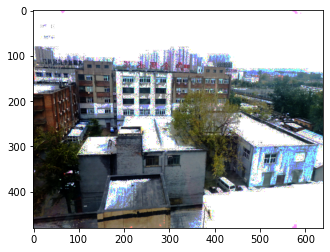

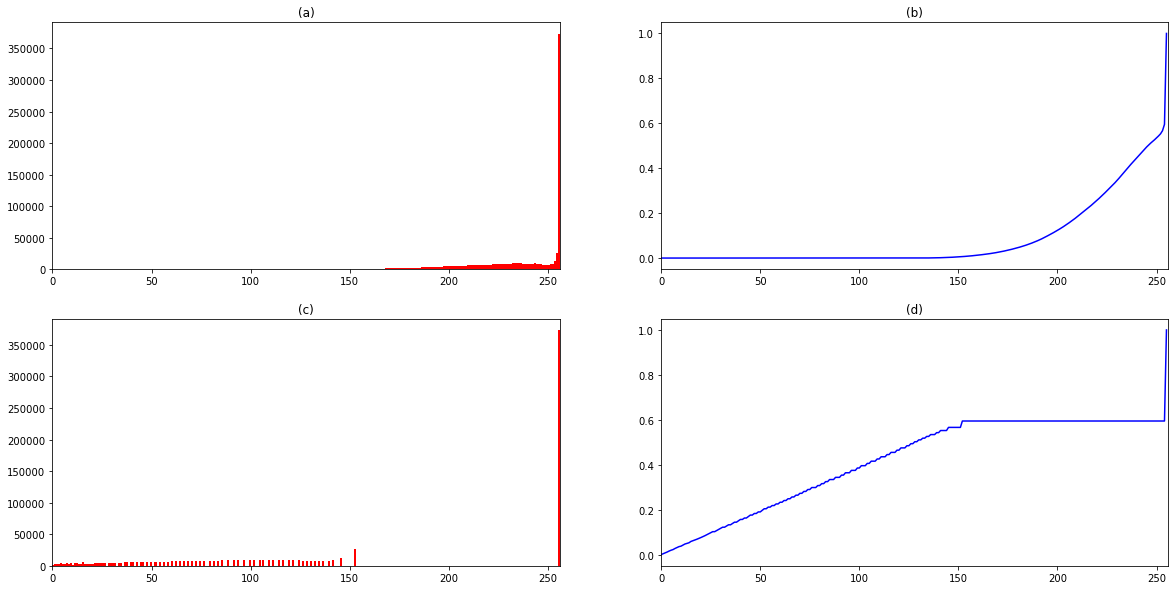

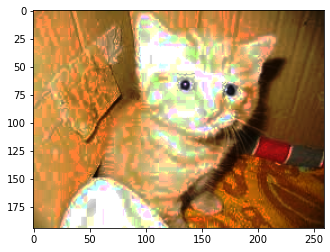

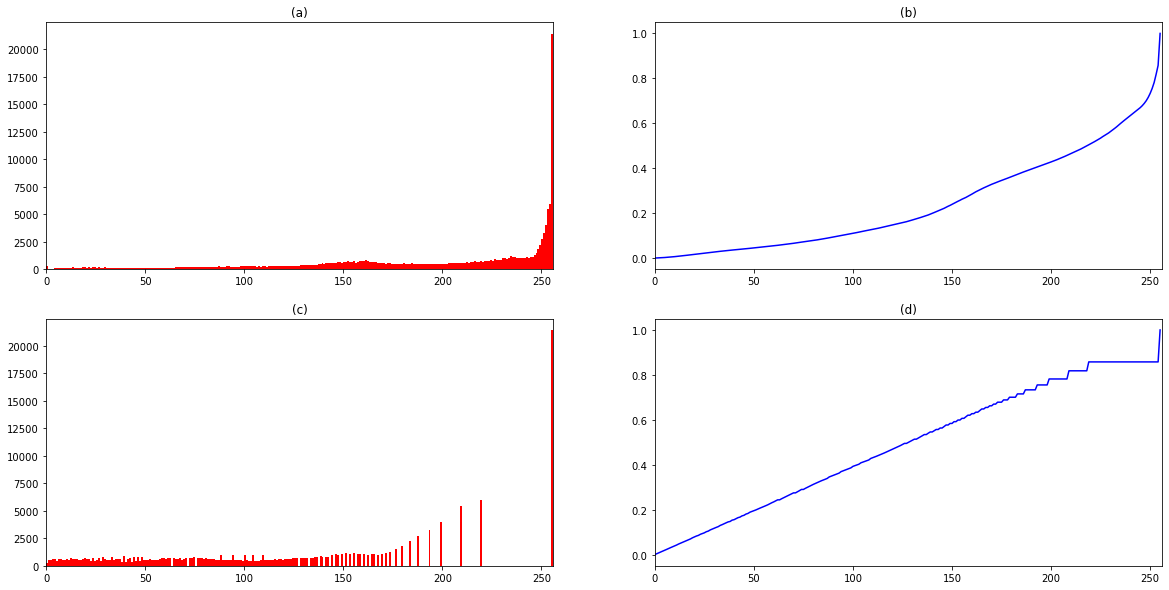

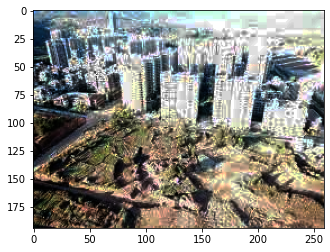

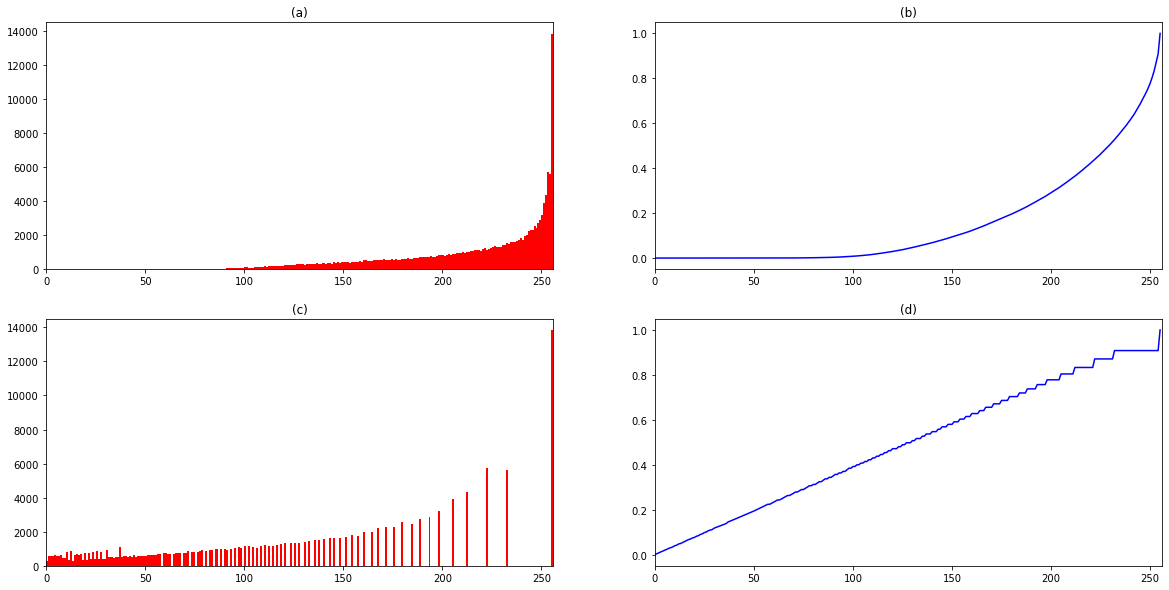

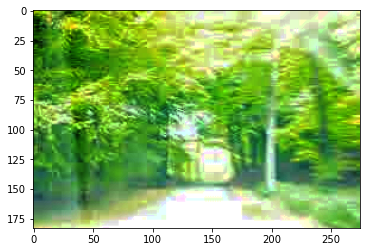

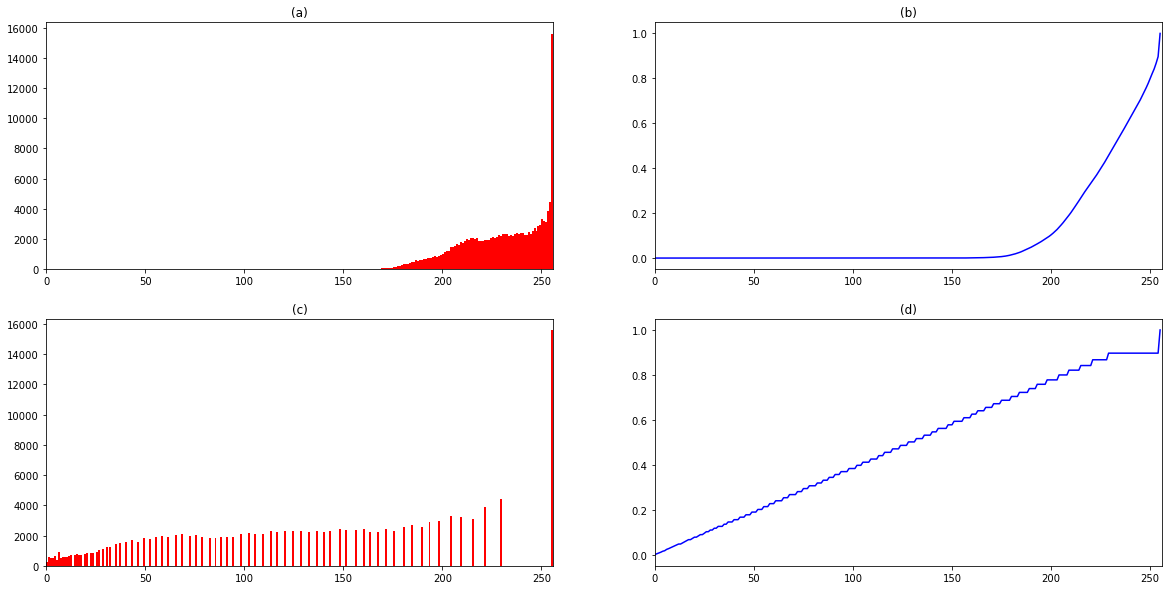

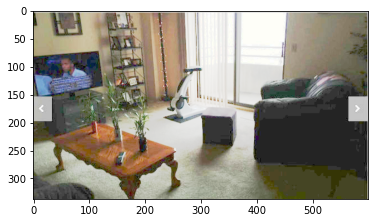

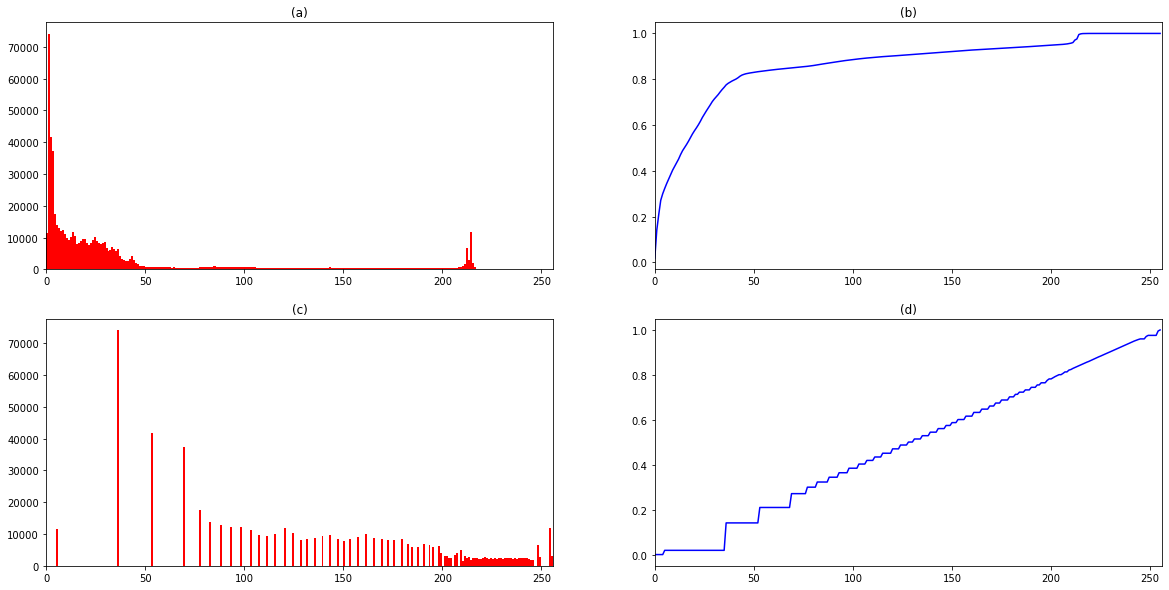

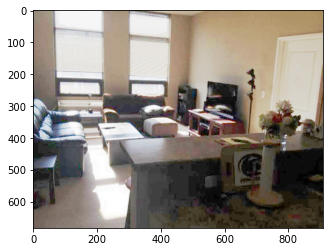

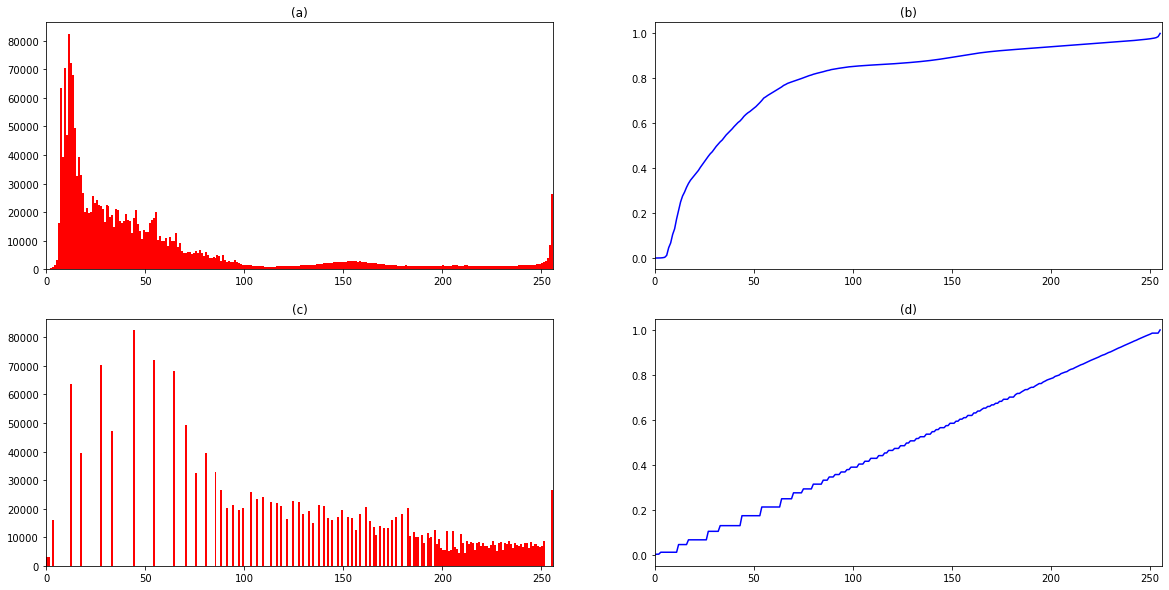

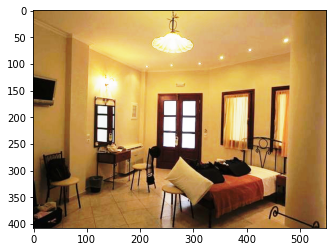

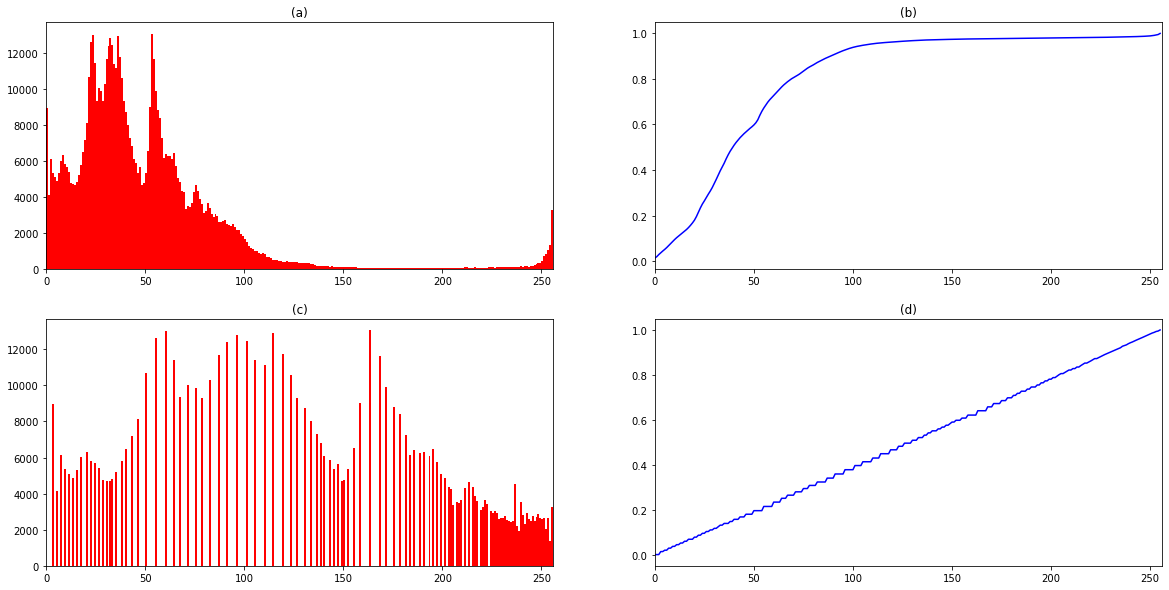

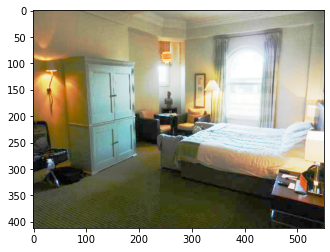

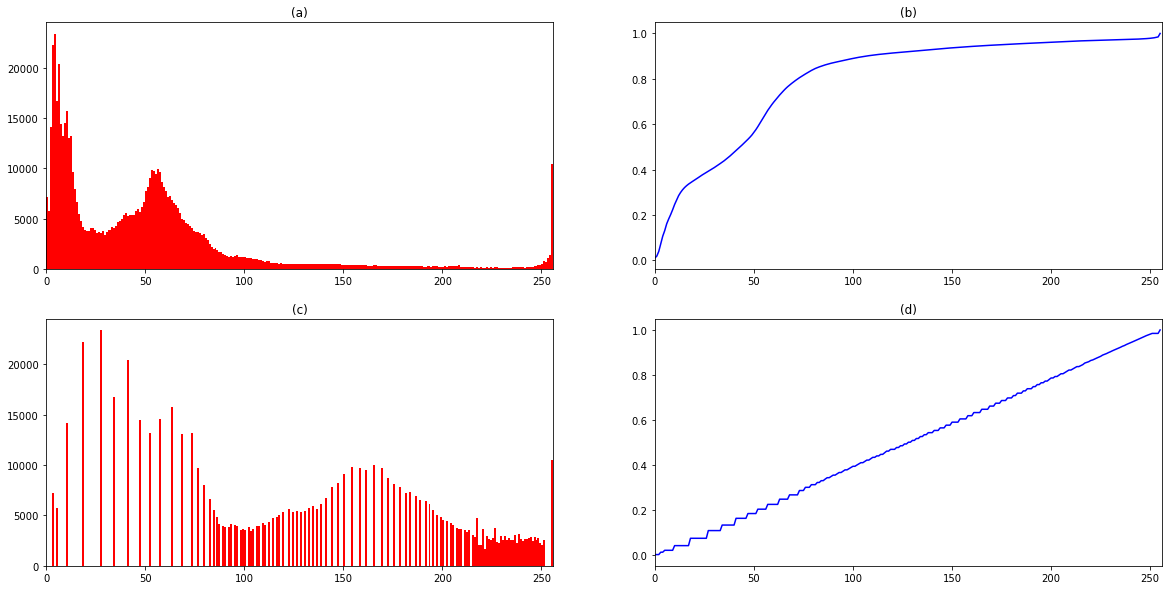

In [69]:
# Read the sample image
base_path = 'sample_images/'
save_path = 'base_heImages/'
imgList = ["sample01.jpg","sample02.jpeg","sample03.jpeg","sample04.jpeg","sample05.jpeg","sample06.jpg","sample07.jpg","sample08.jpg"]
for imgPath in imgList:
    img = cv2.imread(base_path+imgPath)
    #calculate histogram with probability
    hist, bins = np.histogram(img.flatten(), 256, [0, 256], density=True)
    #calculate cdf
    cdf = np.cumsum(hist)
    #apply round operation to calculate the mapping
    mapping = np.round((256-1)*cdf)
    mapping = mapping.astype("uint8")
    #transform image
    img_he = np.array([mapping[i] for i in img])
    #convert bgr format to rgb format
    plt.imshow(cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB))
    plt.savefig(save_path+imgPath)
    plt.show()

    he_hist, he_bins = np.histogram(img_he.flatten(), 256, [0, 256], density=True)
    he_cdf = he_hist.cumsum()

    plt.figure(figsize=(20,10))

    plt.subplot(2,2,1)
    plt.title('(a)')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])

    plt.subplot(2,2,2)
    plt.title('(b)')
    plt.plot(cdf, color = 'b')
    plt.xlim([0,256])

    plt.subplot(2,2,3)
    plt.title('(c)')
    plt.hist(img_he.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])

    plt.subplot(2,2,4)
    plt.title('(d)')
    plt.plot(he_cdf, color = 'b')
    plt.xlim([0,256])

    plt.show()
